<a href="https://colab.research.google.com/github/jbrun0r/graphs/blob/main/bellman_ford_vs_dijkstra_grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bellman-Ford vs Dijkstra: Análise de Complexidade Temporal

Ambos os algoritmos Bellman-Ford e Dijkstra são algoritmos para encontrar o caminho mais curto em um grafo ponderado. Vamos analisar a complexidade temporal em termos de pior caso, melhor caso e caso médio para ambos.


In [ ]:
import time
import random
import networkx as nx
import matplotlib.pyplot as plt

A função `generate_random_connected_graph` utiliza a biblioteca NetworkX para criar um grafo aleatório conectado, baseado no modelo de Watts-Strogatz. O grafo gerado possui um número especificado de nós e arestas, sendo configurado com uma topologia que mantém uma conectividade global, mas introduz aleatoriedade local. O parâmetro $k$ determina o número de vizinhos mais próximos para cada nó inicial, influenciando a estrutura do grafo. A probabilidade de reconexão ($p$) é fixada em 0.1, proporcionando um equilíbrio entre regularidade e aleatoriedade. Além disso, pesos aleatórios são atribuídos às arestas, variando de 1 a 10.


O modelo de Watts-Strogatz, proposto pelos físicos Duncan J. Watts e Steven H. Strogatz em 1998, é uma abordagem para gerar grafos complexos que equilibram a regularidade local com a aleatoriedade global. Esse modelo se tornou significativo na compreensão das propriedades estruturais de redes complexas, incluindo redes sociais, redes biológicas e sistemas de transporte.

O processo de construção do modelo ocorre da seguinte forma:

* Regularidade Inicial (Regular Lattice): Inicialmente, um anel regular é criado, no qual cada nó é conectado aos seus k vizinhos mais próximos (com k sendo um parâmetro). Esse tipo de estrutura gera uma rede altamente regular e previsível.

* Reconexão Aleatória (Random Rewiring): Com uma probabilidade $p$, cada aresta do grafo é "reescolhida" aleatoriamente, reconectando um dos seus extremos a um nó escolhido ao acaso. Esse processo de reconexão introduz aleatoriedade no grafo e é crucial para criar uma rede com propriedades de mundo real, como curtos caminhos médios.

In [ ]:
def generate_random_connected_graph(nodes, edges):
    """
    Gera um grafo aleatório conectado usando o modelo de Watts-Strogatz.

    Parâmetros:
    - nodes (int): Número de nós no grafo.
    - edges (int): Número de arestas no grafo.

    Retorna:
    - G (Graph): Grafo conectado aleatório gerado.
    """
    k = min(10, nodes - 1)

    G = nx.connected_watts_strogatz_graph(nodes, k, p=0.1)
    for (u, v, w) in G.edges(data=True):
        w['weight'] = random.randint(1, 10)
    return G

O trecho de código apresenta a geração de um grafo conectado aleatório utilizando o modelo Watts-Strogatz. Aqui, está sendo criada uma rede com 1000 nós (nodes) e 3000 arestas (edges), sendo essencialmente um grafo complexo que visa equilibrar a regularidade local com a aleatoriedade global. A função generate_random_connected_graph implementa o modelo Watts-Strogatz, onde inicialmente um anel regular é formado, conectando cada nó aos seus vizinhos mais próximos. Posteriormente, algumas arestas são reconectadas aleatoriamente, introduzindo um elemento de aleatoriedade no grafo. Esse tipo de construção é valioso para a simulação de redes do mundo real, proporcionando uma estrutura que exibe características importantes, como pequenos caminhos médios entre os nós, influenciando a rápida disseminação de informações na rede resultante. O código ilustra o processo de criação de um grafo conectado aleatório com parâmetros específicos de nós e arestas.

In [ ]:
num_nodes = 1000
num_edges = 3000

random_connected_graph = generate_random_connected_graph(num_nodes, num_edges)

## Grafo Conectado Aleatório (Modelo Watts-Strogatz)

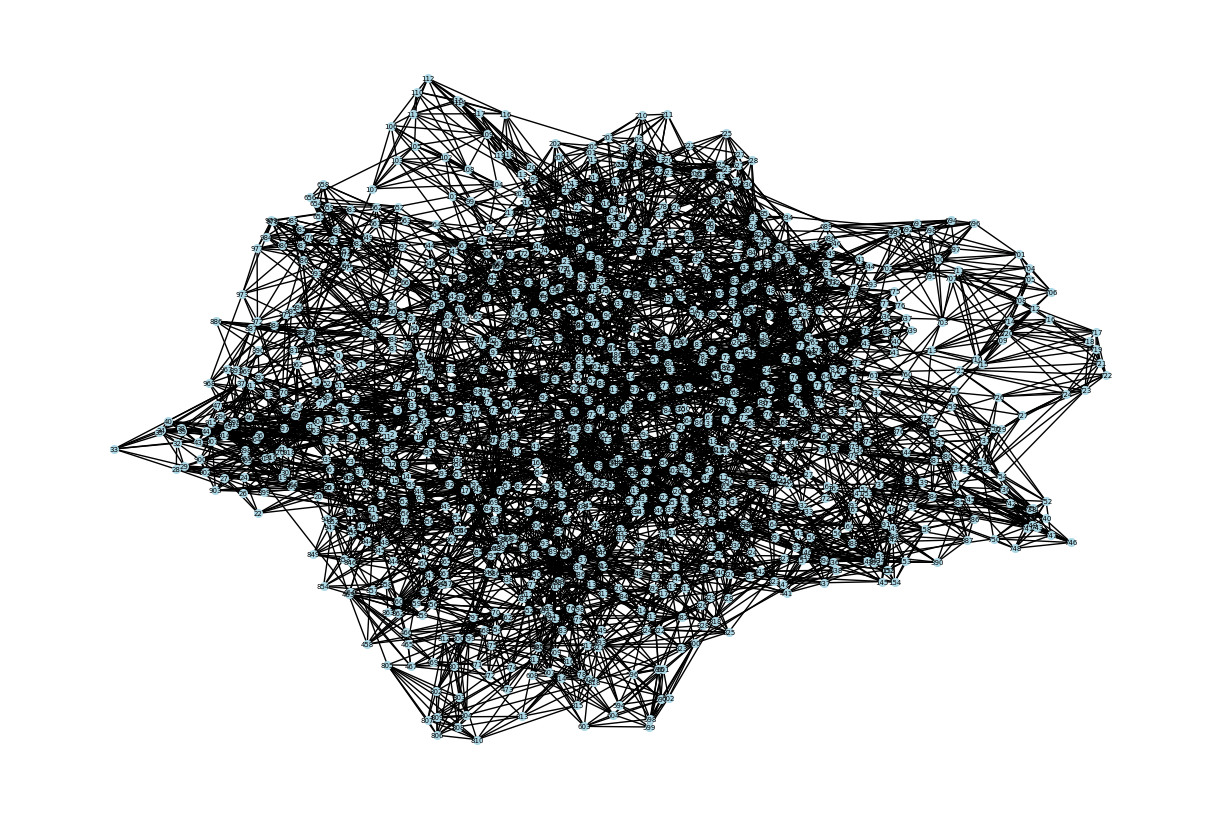

In [ ]:
pos = nx.spring_layout(random_connected_graph)
plt.figure(figsize=(12, 8))
nx.draw(random_connected_graph, pos, with_labels=True, font_size=5, node_size=30, node_color='lightblue')
plt.show()

Esse trecho de código tem como objetivo escolher aleatoriamente dois nós (source e target) no grafo gerado `(random_connected_graph)`

In [ ]:
source_node = random.choice(list(random_connected_graph.nodes()))

target_node = random.choice(list(random_connected_graph.nodes()))

# Algoritmo de Bellman-Ford

A função bellman_ford implementa o algoritmo de Bellman-Ford utilizando a biblioteca NetworkX em Python. Este algoritmo é utilizado para calcular os caminhos mínimos ponderados em grafos direcionados ou não direcionados. O objetivo principal é determinar a distância mínima entre um nó de origem e um nó de destino no grafo. Além disso, a função registra o tempo de execução da operação.



In [ ]:
def bellman_ford(graph, source_node, target_node):
    start_time = time.time()
    try:
        distances = nx.bellman_ford_path_length(graph, source=source_node, target=target_node, weight='weight')
        end_time = time.time()
        return distances, end_time - start_time
    except nx.NetworkXNoPath:
        print(f"O nó {target_node} não é alcançável a partir do nó {source_node}.")
        return None, None

**Este trecho de código aplica o algoritmo de Bellman-Ford no grafo** `random_connected_graph` **a partir de um nó de origem (`source_node`) para um nó de destino (`target_node`). O resultado é armazenado nas variáveis** `bellman_ford_distances` **e** `bellman_ford_time`, **que representam as distâncias mínimas calculadas e o tempo de execução do algoritmo, respectivamente.**

**A condição** `if bellman_ford_distances is not None` **verifica se o nó de destino é alcançável a partir do nó de origem. Se for, imprime o tempo de execução do Bellman-Ford e o caminho mais curto obtido pelo algoritmo.**

### Complexidade Temporal do Bellman-Ford:
- **Pior Caso:** $O(|V| \cdot |E|)$ - onde \(|V|\) é o número de vértices e $|E|$ é o número de arestas. A complexidade do Bellman-Ford é mais alta do que a do Dijkstra em geral, tornando-se menos eficiente para grafos densos ou com muitas arestas.

In [ ]:
bellman_ford_distances, bellman_ford_time = bellman_ford(random_connected_graph, source_node, target_node)
if bellman_ford_distances is not None:
    print(f"Tempo de execução do Bellman-Ford: {bellman_ford_time} segundos")
    print(f"Caminho mais curto pelo Bellman-Ford: {bellman_ford_distances}")

Tempo de execução do Bellman-Ford: 0.03414416313171387 segundos
Caminho mais curto pelo Bellman-Ford: 17


# Algoritmo de Dijkstra

A função dijkstra implementa o algoritmo de Dijkstra para encontrar o caminho mais curto entre um nó de origem e um nó de destino em um grafo ponderado. Ela recebe como entrada o grafo (graph), o nó de origem (source_node), e o nó de destino (target_node). O resultado é uma tupla contendo a distância mínima entre os nós e o tempo de execução do algoritmo.

In [ ]:
def dijkstra(graph, source_node, target_node):
    """
    Aplica o algoritmo de Dijkstra em um grafo ponderado.

    Parâmetros:
    - graph (Graph): Grafo ponderado.
    - source_node (hashable): Nó de origem.
    - target_node (hashable): Nó de destino.

    Retorna:
    - Tuple: Distância mínima entre os nós e tempo de execução do algoritmo.
    """
    start_time = time.time()
    try:
        distances = nx.single_source_dijkstra_path_length(graph, source=source_node, weight='weight')
        end_time = time.time()
        return distances[target_node], end_time - start_time
    except nx.NetworkXNoPath:
        print(f"O nó {target_node} não é alcançável a partir do nó {source_node}.")
        return None, None

**Este trecho de código aplica o algoritmo de Dijkstra no grafo** `random_connected_graph` **de um nó de origem (`source_node`) para um nó de destino (`target_node`). Os resultados são armazenados nas variáveis** `dijkstra_distances` **e** `dijkstra_time`, **representando as distâncias mínimas calculadas e o tempo de execução do algoritmo, respectivamente.**

**A condição** `if dijkstra_distances is not None` **verifica se o nó de destino é alcançável a partir do nó de origem. Em caso afirmativo, imprime o tempo de execução do Dijkstra e o caminho mais curto obtido pelo algoritmo.**

In [ ]:
dijkstra_distances, dijkstra_time = dijkstra(random_connected_graph, source_node, target_node)
if dijkstra_distances is not None:
    print(f"Tempo de execução do Dijkstra: {dijkstra_time} segundos")
    print(f"Caminho mais curto pelo Dijkstra: {dijkstra_distances}")

Tempo de execução do Dijkstra: 0.009952306747436523 segundos
Caminho mais curto pelo Dijkstra: 17


### Complexidade Temporal do Dijkstra:
- **Pior Caso:** $O((V + E) \cdot \log(V))$ - onde $|V|$ é o número de vértices e $|E|$ é o número de arestas. A complexidade do Dijkstra é mais eficiente que a do Bellman-Ford, tornando-se preferível para grafos densos ou com muitas arestas.

### Comparação com Bellman-Ford:
- O Dijkstra é mais eficiente em casos onde todos os pesos das arestas são não negativos, possuindo uma complexidade temporal melhor.
- **Vantagens do Dijkstra:**
  - Complexidade temporal melhor $O((V + E) \cdot \log(V))$ para grafos com pesos não negativos.
  - Mais eficiente em casos com todos os pesos das arestas sendo não negativos.
- **Cenários Preferíveis:**
  - Dijkstra é geralmente preferido para grafos com pesos não negativos.
  - Bellman-Ford pode ser escolhido em cenários específicos com a presença de arestas com pesos negativos.
